In [1]:
%reset -f

In [46]:
# Import
from sklearn.feature_selection import SelectPercentile, f_classif, f_regression
import numpy as np
import matplotlib.pyplot as plt
import datetime as DT
import pandas as pd
import math
import scipy as sp
import datetime
from IPython.core.debugger import Tracer
from sklearn.feature_extraction import DictVectorizer
from sklearn.metrics.classification import log_loss

from sklearn import datasets, linear_model
from sklearn.model_selection import GridSearchCV, TimeSeriesSplit
from sklearn.svm import SVC, SVR
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.preprocessing import StandardScaler, LabelEncoder,RobustScaler
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
#from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectKBest

%matplotlib inline
import seaborn as sns; sns.set()
import operator
import itertools
import matplotlib.patches as mpatches
from scipy.stats.stats import pearsonr
import scipy

import utils as ut
import warnings
warnings.filterwarnings('ignore')
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [3]:
%%javascript
IPython.OutputArea.auto_scroll_threshold = 9999;

<IPython.core.display.Javascript object>

In [4]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:95% !important; }</style>"))

## Main area for adding / removing columns and transforming data

In [8]:
def showdistshort(df, cols, threshold=3.5):
    ut.figurefullwidth()
    for i in range(len(cols)):
        ut.subplottitle(i+1,cols[i], w=len(cols))
        sns.distplot(df[cols[i]], bins=20, hist=False)
    
    #print(c,df.shape,"Ouliers", len(outpoints), "{:1.2f}".format(out_per),"%","Nans",nans, "{:1.2f}".format(nan_per),"%","\n")
    plt.show()
    
   
    subplottitle(6, "Outliers", w=6)
    plt.plot(outpoints, 'ro')
    
def showoutliers(df, cols, threshold=3.5):
    ut.figurefullwidth()
    for i in range(len(cols)):
        outliers = mad_based_outlier(df[c].values)
        outpoints = df[c][outliers]
        ut.subplottitle(i+1,cols[i], w=len(cols))
        plt.plot(outpoints,'ro')
    
    #print(c,df.shape,"Ouliers", len(outpoints), "{:1.2f}".format(out_per),"%","Nans",nans, "{:1.2f}".format(nan_per),"%","\n")
    plt.show()
    

In [9]:
len(catcols)
#print(df.head())
print(catcols)
for c in catcols:
    plotcols(df, catcols[0], c)
#plotcols(df, catcols[0], catcols[4])

0

[]


## 1) Explore the data. Provide summary statistics and at least three visualizations for the variable columns (one at a time, or in combination). In a brief paragraph, summarize the distributions for variable values and explain your choices for visualization. Are there any anomalous distributions for variables? How did you determine this?


In [11]:
#read in the file
f1 = "/Users/david/data/dataset_challenge_one (6) (1) (1).tsv"
# read csv file into a list, split on commas
contents = [line.strip().split("\t") for line in open(f1)]
variables = contents[0]
contents = contents[1:]
#contents[0]

from numpy import genfromtxt
my_data = genfromtxt(f1, delimiter='\t')
print(np.shape(my_data))
y = my_data[1:,-1]
print(y[:10])
my_data = my_data[1:,:-1]
my_data
print(np.shape(my_data))
x = my_data

ncoords = [n[1] for n in np.argwhere(np.isnan(x))]
ncoords.sort(reverse=True)
for n in ncoords:
    x = scipy.delete(x, n, 1)
print(np.shape(x))
[n[1] for n in np.argwhere(np.isnan(x))]


(273, 1554)
[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  1.]


array([[-0.954246,  0.051024, -0.111203, ..., -0.087631, -0.369153,
         0.153795],
       [ 0.244626, -0.199602, -0.111397, ..., -0.231547, -0.643019,
        -0.014098],
       [ 0.082434, -0.156199, -0.08498 , ..., -0.114298,  0.258495,
        -0.198911],
       ..., 
       [-0.413171,  0.839933,  0.040242, ..., -0.510884,  0.251903,
        -0.822792],
       [ 0.068256,  0.036255, -0.014642, ..., -0.396531,  0.356816,
         0.345088],
       [-0.02935 , -0.260638,  0.039084, ...,  0.794952, -1.089303,
        -0.326193]])

(272, 1553)
(272, 1551)


[]

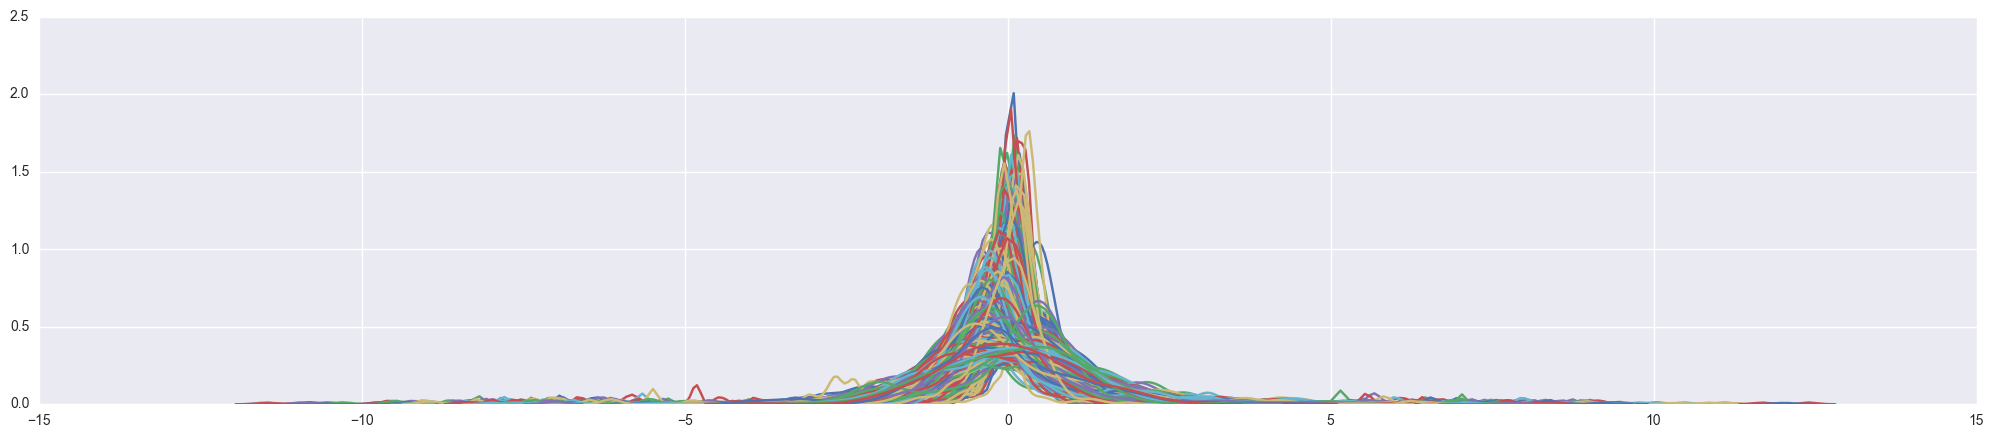

In [12]:
#extract into array
ss = StandardScaler()
xs = ss.fit_transform(x)

# 3 visuals for columns
def showdistcomb(x):
    ut.figurefullwidth()
    for i in range(np.shape(x)[1]):
    #    ut.subplottitle(i+1,cols[i], w=len(cols))
        sns.distplot(x[:,i], bins=20, hist=False)
    
    #print(c,df.shape,"Ouliers", len(outpoints), "{:1.2f}".format(out_per),"%","Nans",nans, "{:1.2f}".format(nan_per),"%","\n")
    plt.show()
showdistcomb(xs)
# summary stats
# anomolous dists? how to determine?

## 2) Present a Principal Components Analysis (PCA) plot for the samples. It should contain a scatterplot of the sample points with the axes PC1 vs. PC2. Indicate on the plot which samples have class = 1 and which have class = 0. 

[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0]

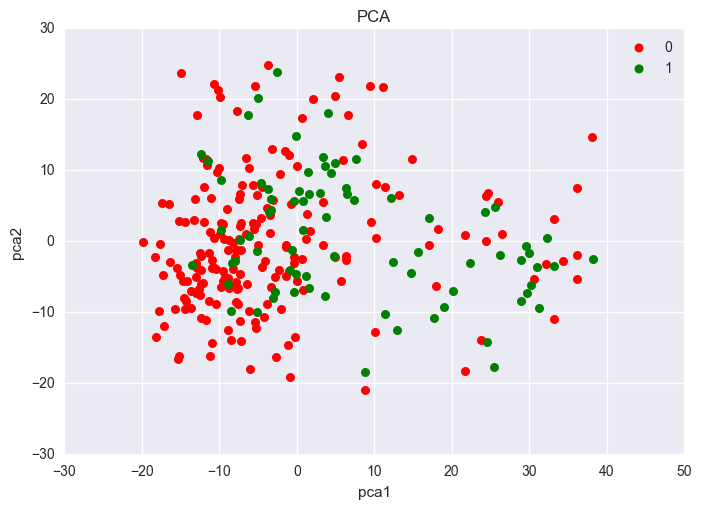

In [14]:
list(y[:10])
pc1 = PCA(n_components=2)
x_pca = pc1.fit_transform(xs)

for col, i, label in zip(["r","g"], [0, 1], [0,1]):
        plt.scatter(x_pca[y==i, 0], x_pca[y==i,1],
                    color=col, lw=2, label=label)
        
#s1 = plt.scatter(x_pca[:,0], x_pca[:,1], c=cl, label=list(cl))
plt.legend(loc='best')
plt.xlabel("pca1")
plt.ylabel("pca2")
plt.title('PCA')

## 3a) Calculate a statistic for every variable that describes its relationship with the class column. Don't list them all, but for the variable column with the most significant statistic, provide a visualization that shows its relationship with class. Include a brief paragraph describing your choices of statistic and visualization.

SelectPercentile(percentile=10,
         score_func=<function f_classif at 0x10d813d08>)

1494


{'boxes': [<matplotlib.lines.Line2D at 0x11f05a550>,
 'caps': [<matplotlib.lines.Line2D at 0x11f062f60>,
 'fliers': [<matplotlib.lines.Line2D at 0x11f06e9b0>,
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x11f06aa90>,
 'whiskers': [<matplotlib.lines.Line2D at 0x11f05af60>,
  <matplotlib.lines.Line2D at 0x11f073c18>]}

([<matplotlib.axis.XTick at 0x11e777fd0>,
 <a list of 2 Text xticklabel objects>)

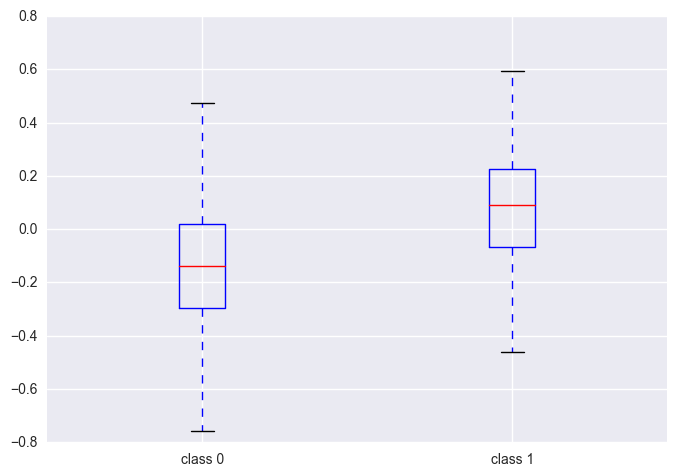

<Container object of 1551 artists>

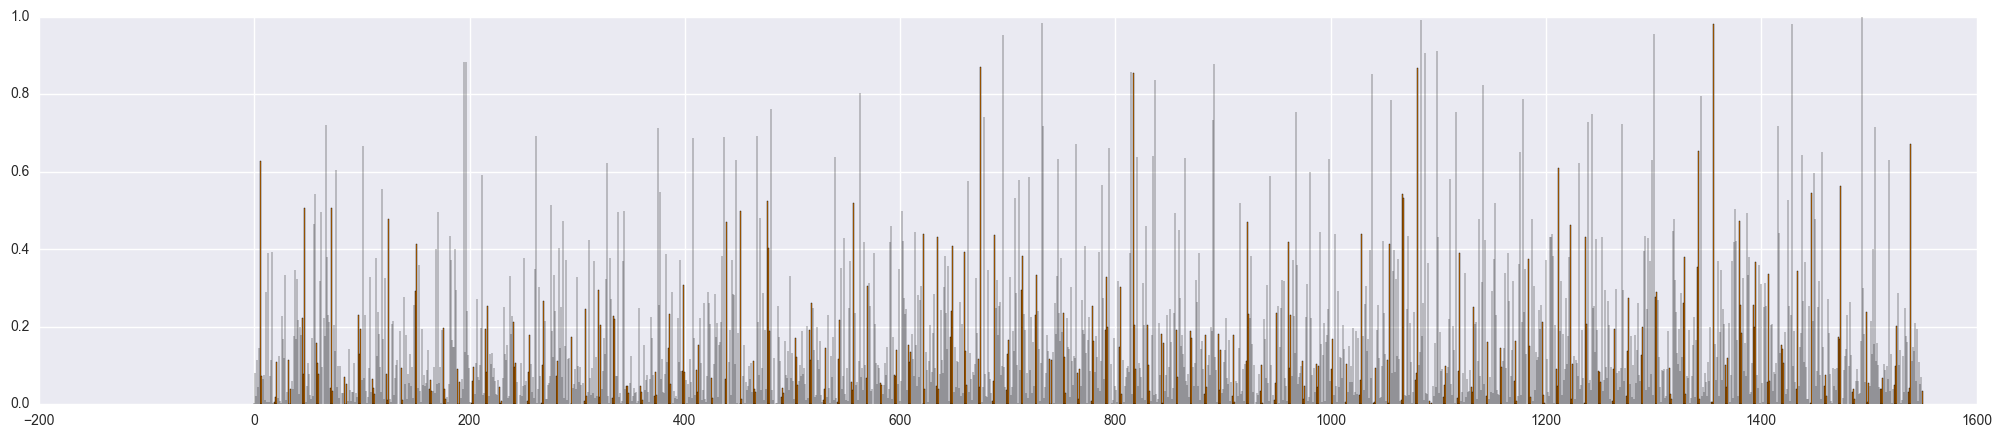

In [15]:
selector = SelectPercentile(f_classif, percentile=10)
selector.fit(x, y)
pvals = selector.pvalues_
idx = np.argmax(selector.scores_)

d = [x[y==0,1494], x[y==1,1494]]


print(idx)
plt.boxplot(d)
plt.xticks([1, 2], ['class 0', 'class 1'])
#plt.scatter(x[:,1494], y)
plt.show()
ut.figurefullwidth()
scores = -np.log10(pvals)
scores /= scores.max()
X_indices = np.arange(x.shape[-1])
plt.bar(X_indices - .45, scores, width=.2,
        label=r'Univariate score ($-Log(p_{value})$)', color='darkorange')

## 3b) Calculate a statistic for every variable that describes its relationship with PC1 (i.e. the first principal component). For the variable with the most significant statistic, provide a visualization that shows its relationship with PC1. Include a brief paragraph describing your choices of statistic and visualization.

SelectPercentile(percentile=10,
         score_func=<function f_regression at 0x10d813ea0>)

1239


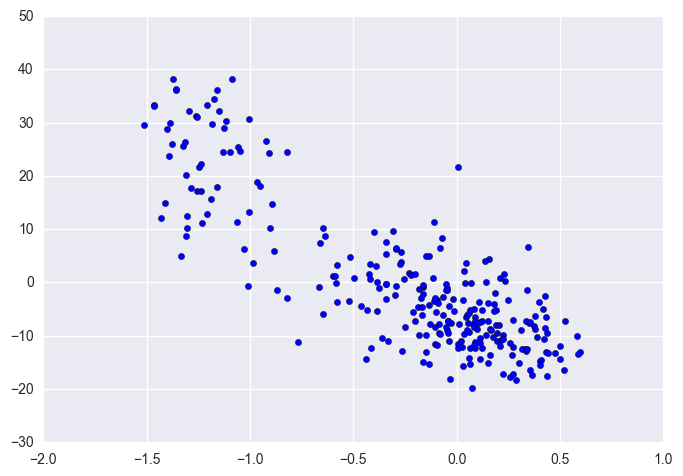

<Container object of 1551 artists>

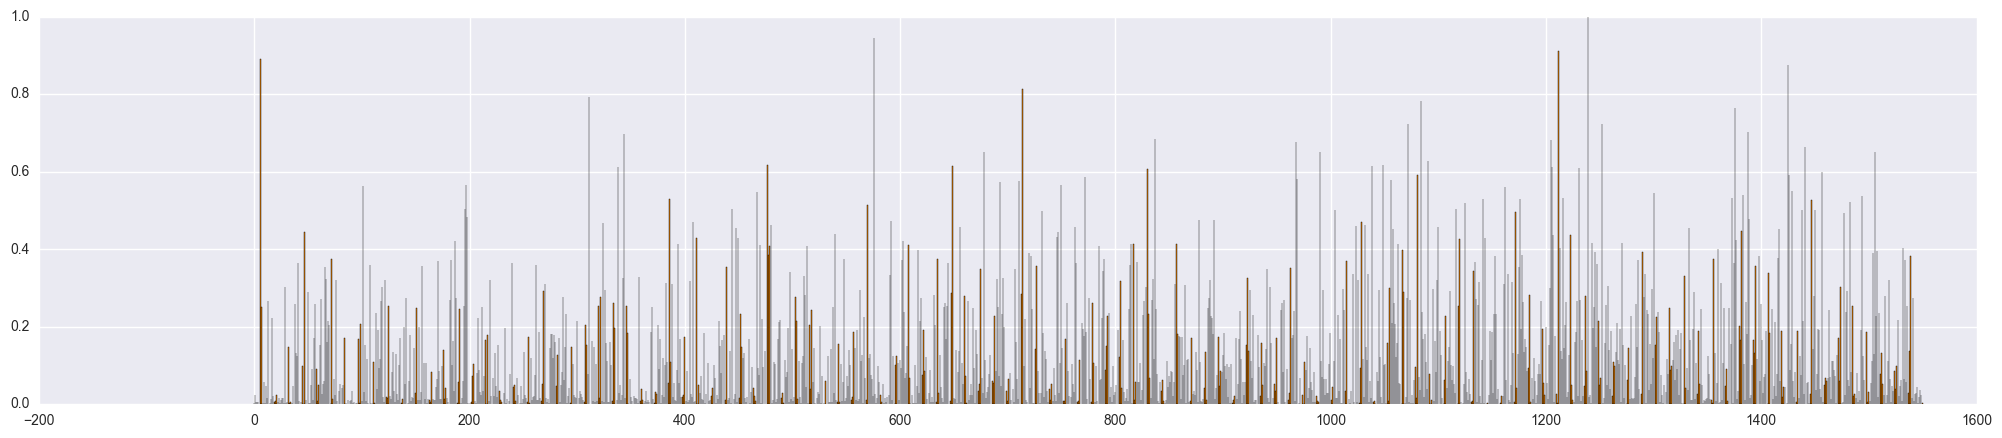

In [16]:
s2 = SelectPercentile(f_regression, percentile=10)
s2.fit(x, x_pca[:,0])
pvals = s2.pvalues_
idx = np.argmax(s2.scores_)

print(idx)
plt.scatter(x[:,1239], x_pca[:,0])
#plt.scatter(x[:,1494], y)
plt.show()
ut.figurefullwidth()
scores = -np.log10(pvals)
scores /= scores.max()
X_indices = np.arange(x.shape[-1])
plt.bar(X_indices - .45, scores, width=.2,
        label=r'Univariate score ($-Log(p_{value})$)', color='darkorange')

## 4) Create a classifier model predicting class of each sample using some or all of the variables in the dataset. Use cross-validation to calculate the effectiveness of your classifier. Provide a short paragraph detailing your rationale for picking a classifier method, selecting a subset of variables for the model (if you did this), followed by a summary of your classifier's performance.

In [50]:
from sklearn.pipeline import make_pipeline
from sklearn import svm
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix, precision_recall_fscore_support, classification_report
from sklearn.dummy import DummyClassifier
ss2 = RobustScaler()
se2 = SelectPercentile(f_classif, percentile=100)
pc2 = PCA(n_components=2)
#also look at most_frequent
dummy = DummyClassifier(strategy="stratified")
dummy.fit( x,y )
clf = svm.SVC(kernel='linear')
pipe1 = Pipeline([('ss2', ss2), ('pc2',pc2),('se2', se2), ('clf',clf)])
pipe2 = Pipeline([('ss2', ss2), ('pc2',pc2),('se2', se2), ('clf',dummy)])
pipe1_grid = {"clf__kernel": ['linear', 'rbf'],
              "clf__C": [.01, .1, 1],
              "pc2__n_components":[2,5,10, 20, 100],
              #"se2__percentile": [1, 5, 10, 20, 40],
              }
pipe2_grid = {
                "clf__strategy":["stratified","most_frequent"],
                "pc2__n_components":[2,5,10],
              #  "se2__percentile": [1, 5, 10, 20, 40],
              }

#y_pred = cross_val_predict(pipe, x, y, cv=5)
grid1 = GridSearchCV(pipe1, param_grid=pipe1_grid)
grid2 = GridSearchCV(pipe2, param_grid=pipe2_grid)

grid1.fit(x, y)
grid2.fit(x,y)
ms1 = np.array(grid1.cv_results_['mean_test_score'])
ms2 = np.array(grid2.cv_results_['mean_test_score'])
grid1.best_params_
grid1.best_estimator_
ms1.mean()
ms2.mean()
#cm = confusion_matrix(y, y_pred, labels=[0,1])

#ut.plot_catmatrix(cm, [0, 1], [0, 1], x_title ="predicted", y_title="true")
#precision_recall_fscore_support(y, y_pred, average='macro')
#print(classification_report(y, y_pred))


#compare to baseline



DummyClassifier(constant=None, random_state=None, strategy='stratified')

GridSearchCV(cv=None, error_score='raise',
       estimator=Pipeline(steps=[('ss2', RobustScaler(copy=True, quantile_range=(25.0, 75.0), with_centering=True,
       with_scaling=True)), ('pc2', PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('se2', SelectPercentile(percentile=100,
         score_...,
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))]),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'clf__kernel': ['linear', 'rbf'], 'clf__C': [0.01, 0.1, 1], 'pc2__n_components': [2, 5, 10, 20, 100]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

GridSearchCV(cv=None, error_score='raise',
       estimator=Pipeline(steps=[('ss2', RobustScaler(copy=True, quantile_range=(25.0, 75.0), with_centering=True,
       with_scaling=True)), ('pc2', PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('se2', SelectPercentile(percentile=100,
         score_func=<function f_classif at 0x10d813d08>)), ('clf', DummyClassifier(constant=None, random_state=None, strategy='stratified'))]),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'clf__strategy': ['stratified', 'most_frequent'], 'pc2__n_components': [2, 5, 10]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

{'clf__C': 1, 'clf__kernel': 'linear', 'pc2__n_components': 10}

Pipeline(steps=[('ss2', RobustScaler(copy=True, quantile_range=(25.0, 75.0), with_centering=True,
       with_scaling=True)), ('pc2', PCA(copy=True, iterated_power='auto', n_components=10, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('se2', SelectPercentile(percentile=100,
         score...,
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))])

0.71703431372549042

0.65563725490196079